# Análise Exploratória de Dados

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime as dt
import warnings
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from random import sample
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [2]:
# read data
data = pd.read_csv("use-of-force.csv") 
data = data.fillna('-') # Substituindo os valores vazios por '-'
data.head()

,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender
0,18412-2238-14470,18412,Level 1 - Use of Force,2017-11-28T01:40:00,-,-,-,2238,14470,Black or African American,Female
1,16162-1589-12833,16162,Level 1 - Use of Force,2017-06-22T04:15:00,-,-,-,1589,12833,Black or African American,Male
2,15041-2017-12130,15041,Level 1 - Use of Force,2017-03-30T15:59:00,-,-,-,2017,12130,White,Male
3,29139-4759-15571,29139,Level 1 - Use of Force,2018-02-15T13:06:00,-,-,-,4759,15571,Black or African American,Male
4,30425-4745-16299,30425,Level 1 - Use of Force,2018-07-17T21:00:00,-,-,-,4745,16299,White,Female


### 1) Como é a distribuição do uso de força dentre as delegacias e os setores? Em cada setor, qual o beat com maior número de incidentes? Apresente também o ranking dos setores segundo o percentual de incidentes "Level 2" em relação ao total de incidentes do respectivo setor.

In [3]:
# Plotar os garficos de barras 
def plotGrafic(mat_table, list_colus, type_d, x0):
    y_list = []
    trace_list = []
    for i in range(0, len(list_colus)):
        y_list.append(list(mat_table.loc[list_colus[i]].values))
    
    for j in range(0,len(list_colus)):
        sorteados = sample(range(0, 255), 10)
        color = str('rgb('+str(sorteados[0])+', '+str(sorteados[1])+', '+str(sorteados[2])+')')
        trace_list.append(go.Bar(x = x0, y = y_list[j], name = type_d+' '+list_colus[j],
                marker=dict(color=color) ) )
    return trace_list

In [4]:
# Delegacias
precinct = np.array(data['Precinct'].unique())
precinct

array(['-', 'E', 'W', 'S', 'N', 'X', 'SW'], dtype=object)

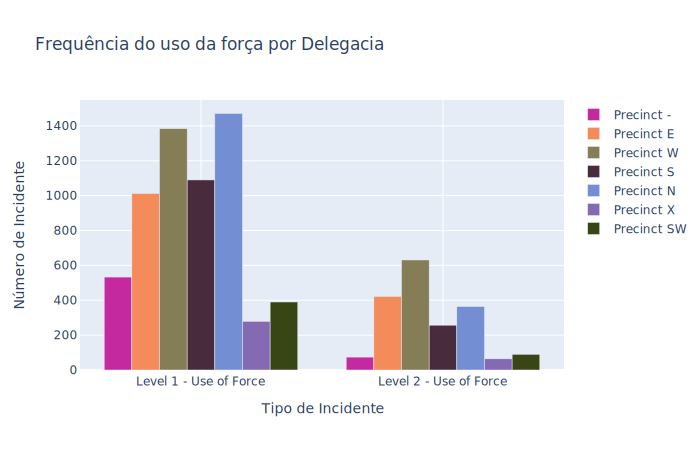

In [9]:
type_calo = 'Precinct'
x0 = ['Level 1 - Use of Force', 'Level 2 - Use of Force']
precinct_mat = data.pivot_table(index = 'Precinct', columns = 'Incident_Type', 
                            values = 'Incident_Num', aggfunc='count')
lis_gra = plotGrafic(precinct_mat, precinct, type_calo, x0)

layout = go.Layout(yaxis_title="Número de Incidente", xaxis_title="Tipo de Incidente",
                   barmode='group', title= "Frequência do uso da força por Delegacia")
fig = go.Figure(data=lis_gra, layout=layout)
#iplot(fig)
fig.show(renderer="svg")

In [6]:
# Setores
sector = np.array(data['Sector'].unique())
sector

array(['-', 'E', 'C', 'K', 'M', 'S', 'Q', 'O', 'B', 'N', 'D', 'G', 'R',
       'U', 'X', 'W', 'J', 'F', 'L', '99'], dtype=object)

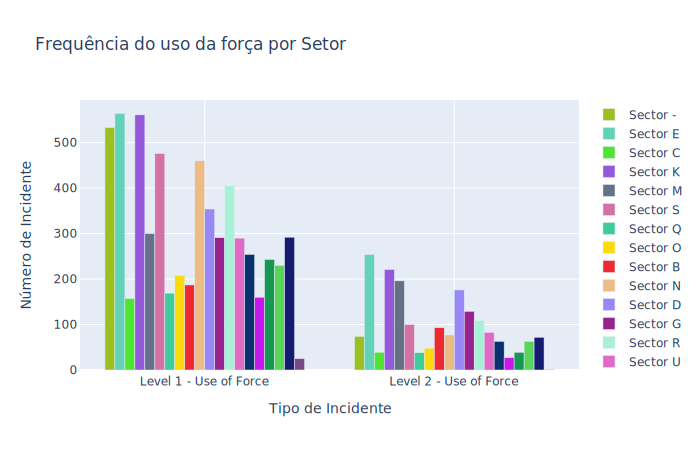

In [10]:
type_calo = 'Sector'
x0 = ['Level 1 - Use of Force', 'Level 2 - Use of Force']

precinct_mat = data.pivot_table(index = 'Sector', columns = 'Incident_Type', 
                            values = 'Incident_Num', aggfunc='count')
lis_gra = plotGrafic(precinct_mat, sector, type_calo, x0)

layout = go.Layout(yaxis_title="Número de Incidente", xaxis_title="Tipo de Incidente",
                   barmode='group', title= "Frequência do uso da força por Setor")
fig = go.Figure(data=lis_gra, layout=layout)
#iplot(fig)
fig.show(renderer="svg")